In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('states_all.csv')
df

Saving states_all.csv to states_all (1).csv


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244.243515,288.172322,221.519266,262.720477
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.554934,277.180126,223.353443,269.553823
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.043993,274.673821,213.127835,265.767860
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.588947,286.376160,221.750123,259.753002


In [0]:
states = df.copy ()

In [0]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"] 



In [19]:
for col in fill_list:
    states.fillna(states.interpolate(), inplace=True)
states


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,211.790904,258.776900,207.088116,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,265.519676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,671.0,7469.0,7537.0,7086.0,6405.0,159595.0,27361.0,94258.0,244.243515,288.172322,221.519266,262.720477
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,671.0,7469.0,7537.0,7086.0,6405.0,159595.0,27361.0,94258.0,237.554934,277.180126,223.353443,269.553823
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,671.0,7469.0,7537.0,7086.0,6405.0,159595.0,27361.0,94258.0,234.043993,274.673821,213.127835,265.767860
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,585700.0,53570.0,454302.0,671.0,7469.0,7537.0,7086.0,6405.0,159595.0,27361.0,94258.0,241.588947,286.376160,221.750123,259.753002


In [5]:
states.dropna (inplace=True)
states

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,917541.566176,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,7.350360e+05,429950.933824,1.740530e+05,8224.000000,55460.00000,57948.000000,58025.000000,41167.000000,577954.717647,282069.084967,7.316340e+05,208.327876,252.187522,207.963517,263.683325
1,1992_ALASKA,ALASKA,1992,917541.566176,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,3.509020e+05,429950.933824,3.745100e+04,2371.000000,10152.00000,9748.000000,8789.000000,6714.000000,577954.717647,282069.084967,1.224870e+05,234.797280,278.461453,218.897886,258.859712
2,1992_ARIZONA,ARIZONA,1992,917541.566176,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,1.007732e+06,429950.933824,6.091140e+05,2544.000000,53497.00000,55433.000000,49081.000000,37410.000000,577954.717647,282069.084967,6.734770e+05,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,917541.566176,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,4.834880e+05,429950.933824,1.452120e+05,808.000000,33511.00000,34632.000000,36011.000000,27651.000000,577954.717647,282069.084967,4.414900e+05,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,917541.566176,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,8.520926e+06,429950.933824,2.044688e+06,59067.000000,431763.00000,418418.000000,363296.000000,270675.000000,577954.717647,282069.084967,5.254844e+06,208.398961,260.892247,196.764414,263.683325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,17840.958495,68810.96201,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,9.139695e+05,244.243515,288.172322,221.519266,262.720477
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,17840.958495,68810.96201,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,9.139695e+05,237.554934,277.180126,223.353443,269.553823
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,17840.958495,68810.96201,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,9.139695e+05,234.043993,274.673821,213.127835,265.767860
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,17840.958495,68810.96201,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,9.139695e+05,241.588947,286.376160,221.750123,259.753002


Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?

1)
From the previous exercises we found math and reading scores to be the relevant variables. So we will include only these to the data. 

we will use the formula below:
(Ax1 + Bx2 + Cx3... + Zxn)/n

In [23]:
grades_4g = states ["GRADES_4_G"]
avg_math_4 = states ["AVG_MATH_4_SCORE"]
avg_reading_4 = states ["AVG_READING_4_SCORE"]
grades_8g = states ["GRADES_8_G"] 
avg_math_8 = states ["AVG_MATH_8_SCORE"]
avg_reading_8= states ["AVG_READING_8_SCORE"]


states["weighted"] = (grades_4g*((avg_math_4 +avg_reading_4)*0.5) + grades_8g * ((avg_math_8 + avg_reading_8)*0.5))/(grades_4g + grades_8g)

print (states ['weighted'])

0              NaN
1       232.851618
2       235.639070
3       235.441283
4       230.756386
           ...    
1913    253.507504
1914    251.248827
1915    246.184224
1916    251.728709
1917    248.894837
Name: weighted, Length: 1918, dtype: float64


2)

In [0]:
states_correlated = states[["TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE","weighted"]
           ].corr()

Text(0.5, 1.0, 'Correlation Matrix: Expenditure')

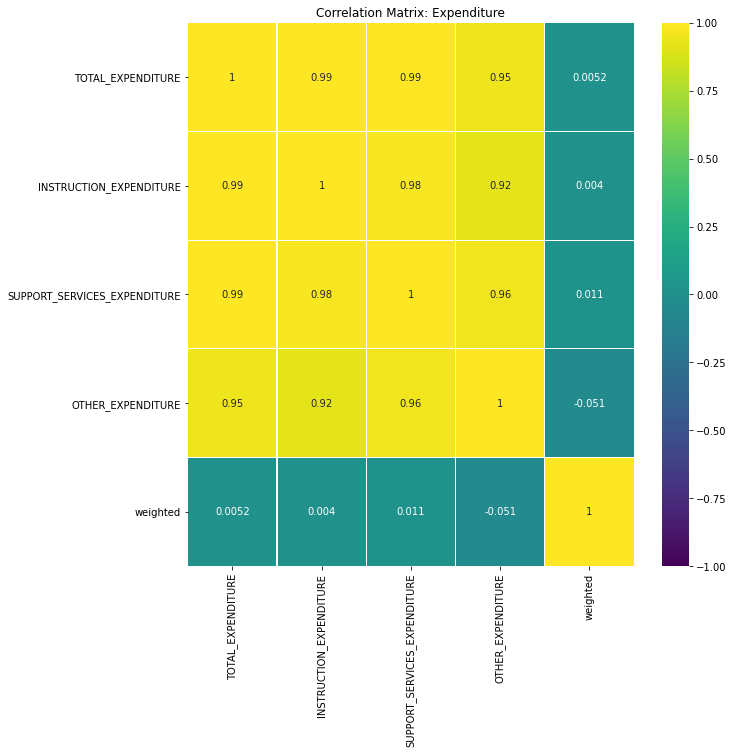

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(states_correlated , annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix: Expenditure")

3)


In [11]:
from sklearn.decomposition import PCA 
states_expenditure = states[['INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE','TOTAL_EXPENDITURE','OTHER_EXPENDITURE']]
array_states_exp = states_expenditure.to_numpy()

pca = PCA(n_components=2)
pc = pca.fit_transform(array_states_exp)
print (pca.explained_variance_ratio_)


[0.99610783 0.00334147]


Together they seem to be almost close to 100%